In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import torch
from torch import nn

img = cv2.imread('HW3-Q3-image.jpg',0)
img = img[ 24:300, ]
img = torch.from_numpy(img).float()
img = img[None, None, :]




In [2]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.filter1 = torch.tensor([[[1,0,-1],[1,0,-1],[1,0,-1]],[[1,1,1],[0,0,0],[-1,-1,-1]]])#vertical
        self.filter1 = self.filter1[:,None,:,:].float()

    def forward(self, x):
        x =torch.nn.functional.conv2d(x, self.filter1, stride=1)
        print('------------------------------------------------')
        print("CONV LAYER OUTPUTS")
        plt.imshow(x[0,0,:,:], cmap="gray")
        plt.show()
        plt.imshow(x[0,1,:,:], cmap="gray")
        plt.show()

        print('------------------------------------------------')
        print("RELU ACTIVATED CONV LAYER OUTPUTS")
        x = nn.functional.relu(x)
        plt.imshow(x[0,0,:,:], cmap="gray")
        plt.show()
        x = nn.functional.relu(x)
        plt.imshow(x[0,1,:,:], cmap="gray")
        plt.show()
        print('------------------------------------------------')
        print("POOL LAYER OUTPUTS")
        x= nn.functional.max_pool2d(x,3)
        plt.imshow(x[0,0,:,:], cmap="gray")
        plt.show()
        plt.imshow(x[0,1,:,:], cmap="gray")
        plt.show()
        return x

------------------------------------------------
CONV LAYER OUTPUTS


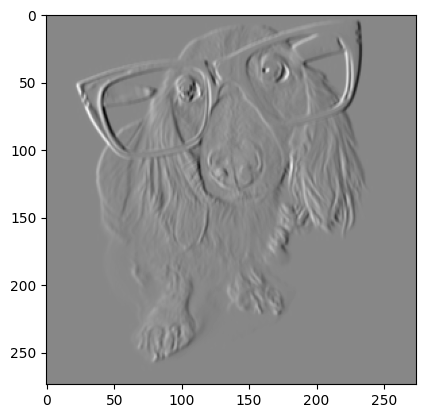

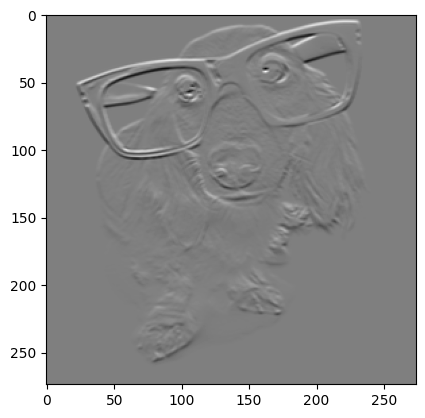

------------------------------------------------
RELU ACTIVATED CONV LAYER OUTPUTS


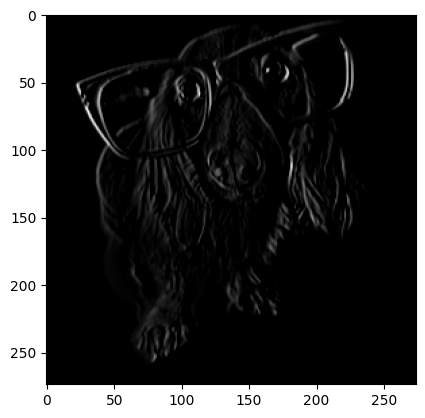

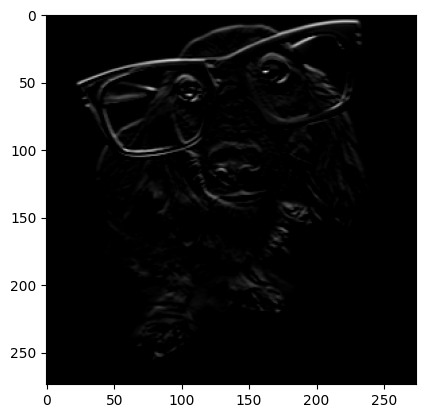

------------------------------------------------
POOL LAYER OUTPUTS


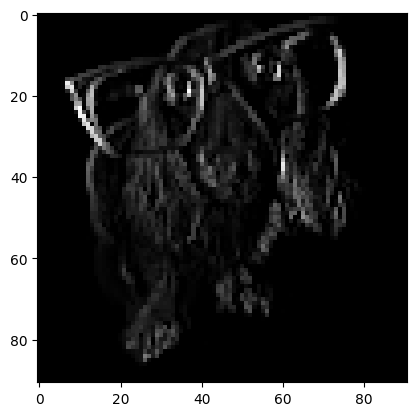

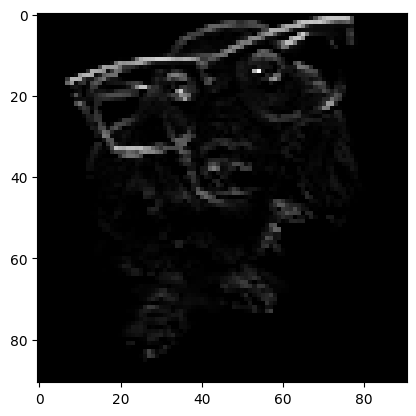

In [3]:
net = NeuralNetwork()
test = net(img)